# UTS

1.   Item daftar
2.   Item daftar



## Metode KNN
Metode KNN adalah metode yang melakukan klasifikasi terhadap objek berdasarkan data pembelajaran yang jaraknya paling dekat dengan obyek tersebut. KNN termasuk algoritma supervised learning. Supervised learning merupakan suatu pembelajaran yang terawasi dimana jika output yang diharapkan telah diketahui sebelumnya.

###Tahapan
1. Tahapan pertama adalah memasukkan nilai k, sedangkan nilai k minimalnya adalah 1 dan maksimalnya adalah jumlah set data latih
2. Melakukan normalisasi untuk semua pola set data latih ataupun set data uji. Hal ini bertujuan supaya rentang keseluruhan nilai pola memiliki rentang nilai yang sama, antara 0 sampai 1. Perhitungan normalisasi yang digunakan adalah metode min-max. 
datax adalah data yang akan dihitung normalisasinya yang diambil berdasarkan kolom datanya.
datamin adalah data terkecil di kolom yang sama
datamax adalah data terbesar di kolom yang sama dengan data yang akan dinormalisasi.
3. Menghitung jaraj Euclidean yang akan disimbolkan sebagai deuclidean (x,y).
dimana i adalah banyaknya set data dan x adalah jumlah set data uji, sedangkan y adalah set data latih.
Tahap selanjutnya adalah lakukan voting atau pemilihan dari jarak euclidean terkecil yang masuk peringkat sejumlah nilai k.
Langkah terakhir adalah menentukan hasil klasifikasi berdasarkan tahap keempat yang terbanyak.

In [ ]:
import pandas as pd
# Read in the data using pandas 
url = "https://raw.githubusercontent.com/SanS2A/dataset/main/dataR2.csv"
df = pd.read_csv(url)
# Check data has been read in properly
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [ ]:
# Show first 15 rows
df.head(10)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
5,49,22.854458,92,3.226,0.732087,6.8317,13.679750,10.31760,530.410,1
6,89,22.700000,77,4.690,0.890787,6.9640,5.589865,12.93610,1256.083,1
7,76,23.800000,118,6.470,1.883201,4.3110,13.251320,5.10420,280.694,1
8,73,22.000000,97,3.350,0.801543,4.4700,10.358725,6.28445,136.855,1
9,75,23.000000,83,4.952,1.013839,17.1270,11.578990,7.09130,318.302,1


In [ ]:
# Check number of rows and columns in dataset
df.shape

(116, 10)

In [ ]:
# Create a dataframe with all training data except the target column
X = df.drop(columns=["Classification"])
# Check that the target variable has been removed
X.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


In [ ]:
#separate target values
y = df["Classification"].values
#view target values
y[0:5]

array([1, 1, 1, 1, 1])

In [ ]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#show first 5 model predictions on the test data
knn.predict(X_test)[0:5]

array([1, 2, 1, 2, 2])

In [ ]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)

0.3333333333333333

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))

[0.5        0.52173913 0.47826087 0.47826087 0.60869565]
cv_scores mean:0.5173913043478261


In [ ]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {"n_neighbors": np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 23}

In [ ]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.5688405797101449

Text(0, 0.5, 'Mean Error')

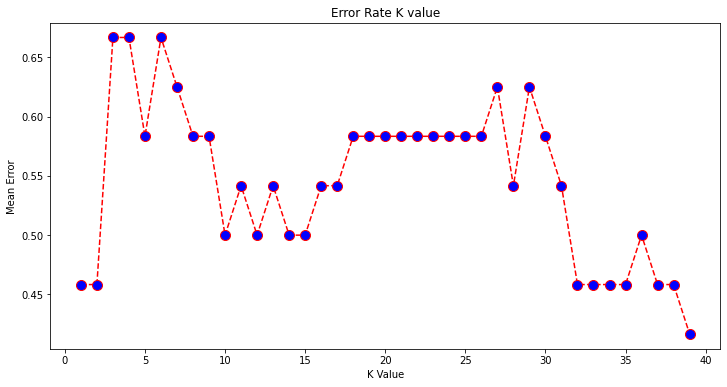

In [ ]:
# Calculating error for K values between 1 and 40 
error = []
import matplotlib.pyplot as plt
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o', 
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')



## Decision Tree
Pengertian Decision Tree
Decision Tree (Pohon keputusan) adalah jenis pembelajaran mesin terawasi(supervise) yang digunakan untuk mengkategorikan atau membuat prediksi berdasarkan bagaimana serangkaian pertanyaan sebelumnya dijawab. Supervise artinya model dilatih dan diuji pada sekumpulan data yang berisi kategorisasi yang diinginkan.

### Jenis Keputusan
Ada dua jenis utama pohon keputusan berdasarkan variabel sasaran, yaitu pohon keputusan variabel kategorikal dan pohon keputusan variabel kontinu.

Pohon keputusan variabel kategori Sebuah pohon keputusan variabel kategoris termasuk variabel target kategoris dibagi ke dalam kategori. Misalnya, kategori bisa ya atau tidak. Kategori berarti bahwa setiap tahap proses pengambilan keputusan termasuk dalam salah satu kategori ini, dan tidak ada di antaranya.

Pohon keputusan variabel kontinu Pohon keputusan variabel kontinu adalah pohon keputusan dengan variabel target kontinu. Misalnya, pendapatan individu yang pendapatannya tidak diketahui dapat diprediksi berdasarkan informasi yang tersedia seperti pekerjaan, usia, dan variabel kontinu lainnya.



**Rumus Gini Index**
$$ Gini Index = 1-Σ_i^n (P_i)^2 $$

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import tree
import seaborn as sns

url = 'https://raw.githubusercontent.com/SanS2A/dataset/main/dataR2.csv'
data = pd.read_csv(url)

In [ ]:
data

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [ ]:
y = data["Classification"]
X = data.drop(columns=["Classification"])
clf = tree.DecisionTreeClassifier(criterion="gini")
clf = clf.fit(X, y)

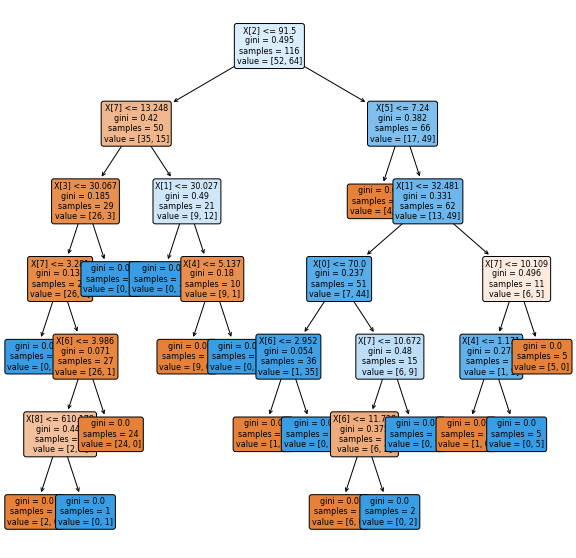

In [ ]:
#plt the figure, setting a black background
plt.figure(figsize=(10,10))
#create the tree plot
a = tree.plot_tree(clf,
                   rounded = True,
                   filled = True,
                   fontsize=8)
#show the plot
plt.show()